In [2]:
# load the pt-pt json file into a dataframe
import pandas as pd
import os 

df = pd.DataFrame()

for json_file in os.listdir('dataset/jsonl'):
    df = pd.concat([df, pd.read_json('dataset/jsonl/' + json_file, lines=True)])
    print(f"Added {json_file} to dataframe")

Added af-ZA.jsonl to dataframe
Added am-ET.jsonl to dataframe
Added ar-SA.jsonl to dataframe
Added az-AZ.jsonl to dataframe
Added bn-BD.jsonl to dataframe
Added cy-GB.jsonl to dataframe
Added da-DK.jsonl to dataframe
Added de-DE.jsonl to dataframe
Added el-GR.jsonl to dataframe
Added en-US.jsonl to dataframe
Added es-ES.jsonl to dataframe
Added fa-IR.jsonl to dataframe
Added fi-FI.jsonl to dataframe
Added fr-FR.jsonl to dataframe
Added he-IL.jsonl to dataframe
Added hi-IN.jsonl to dataframe
Added hu-HU.jsonl to dataframe
Added hy-AM.jsonl to dataframe
Added id-ID.jsonl to dataframe
Added is-IS.jsonl to dataframe
Added it-IT.jsonl to dataframe
Added ja-JP.jsonl to dataframe
Added jv-ID.jsonl to dataframe
Added ka-GE.jsonl to dataframe
Added km-KH.jsonl to dataframe
Added kn-IN.jsonl to dataframe
Added ko-KR.jsonl to dataframe
Added lv-LV.jsonl to dataframe
Added ml-IN.jsonl to dataframe
Added mn-MN.jsonl to dataframe
Added ms-MY.jsonl to dataframe
Added my-MM.jsonl to dataframe
Added nb

In [ ]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,slot_method,judgments
0,0,af-ZA,test,alarm,alarm_set,maak my wakker om vyf v. m. die week,maak my wakker om [time : vyf v. m.] [date : d...,37,"[{'slot': 'time', 'method': 'localization'}, {...","[{'worker_id': '20', 'intent_score': 1, 'slots..."
1,1,af-ZA,train,alarm,alarm_set,maak my wakker nege-uur v. m. op vrydag,maak my wakker [time : nege-uur v. m.] op [dat...,20,"[{'slot': 'time', 'method': 'translation'}, {'...","[{'worker_id': '40', 'intent_score': 1, 'slots..."
2,2,af-ZA,train,alarm,alarm_set,stel 'n alarm vir twee ure van nou af,stel 'n alarm vir [time : twee ure van nou af],20,"[{'slot': 'time', 'method': 'translation'}]","[{'worker_id': '64', 'intent_score': 1, 'slots..."
3,3,af-ZA,test,audio,audio_volume_mute,stil,stil,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."
4,4,af-ZA,train,audio,audio_volume_mute,janneman stilte,janneman stilte,40,[],"[{'worker_id': '45', 'intent_score': 1, 'slots..."


calendar          120870
play              103224
qa                 85935
email              70431
iot                56457
general            49113
weather            43605
transport          41055
lists              40443
news               36159
recommendation     30396
datetime           29478
social             28815
alarm              28050
music              23919
audio              19737
takeaway           18258
cooking            16626
Name: scenario, dtype: int64
calendar          0.143454
play              0.122511
qa                0.101991
email             0.083591
iot               0.067006
general           0.058289
weather           0.051752
transport         0.048726
lists             0.048000
news              0.042915
recommendation    0.036075
datetime          0.034986
social            0.034199
alarm             0.033291
music             0.028388
audio             0.023425
takeaway          0.021669
cooking           0.019732
Name: scenario, dtype: float64


<AxesSubplot: >

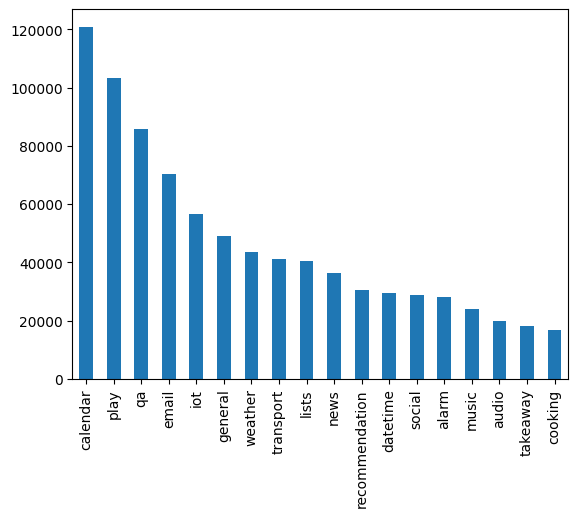

In [3]:
print(df['scenario'].value_counts())

print(df['scenario'].value_counts(normalize=True))

df['scenario'].value_counts().plot(kind='bar')

af-ZA    16521
sl-SL    16521
ml-IN    16521
mn-MN    16521
ms-MY    16521
my-MM    16521
nb-NO    16521
nl-NL    16521
pl-PL    16521
pt-PT    16521
ro-RO    16521
ru-RU    16521
sq-AL    16521
ko-KR    16521
sv-SE    16521
sw-KE    16521
ta-IN    16521
te-IN    16521
th-TH    16521
tl-PH    16521
tr-TR    16521
ur-PK    16521
vi-VN    16521
zh-CN    16521
lv-LV    16521
kn-IN    16521
am-ET    16521
fi-FI    16521
ar-SA    16521
az-AZ    16521
bn-BD    16521
cy-GB    16521
da-DK    16521
de-DE    16521
el-GR    16521
en-US    16521
es-ES    16521
fa-IR    16521
fr-FR    16521
km-KH    16521
he-IL    16521
hi-IN    16521
hu-HU    16521
hy-AM    16521
id-ID    16521
is-IS    16521
it-IT    16521
ja-JP    16521
jv-ID    16521
ka-GE    16521
zh-TW    16521
Name: locale, dtype: int64
af-ZA    0.019608
sl-SL    0.019608
ml-IN    0.019608
mn-MN    0.019608
ms-MY    0.019608
my-MM    0.019608
nb-NO    0.019608
nl-NL    0.019608
pl-PL    0.019608
pt-PT    0.019608
ro-RO    0.019608
ru-RU    0

<AxesSubplot: >

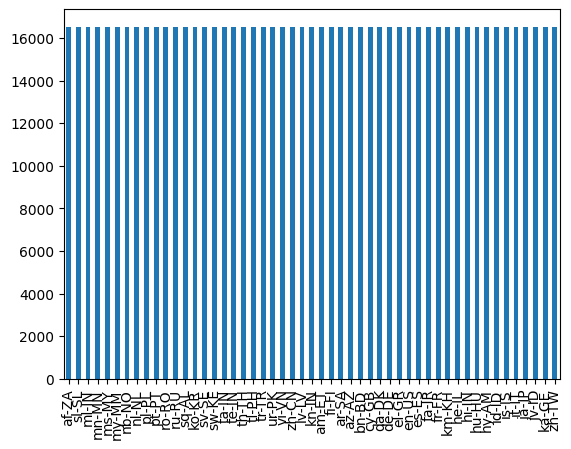

In [ ]:
print(df['locale'].value_counts())

print(df['locale'].value_counts(normalize=True))

df['locale'].value_counts().plot(kind='bar')

<AxesSubplot: >

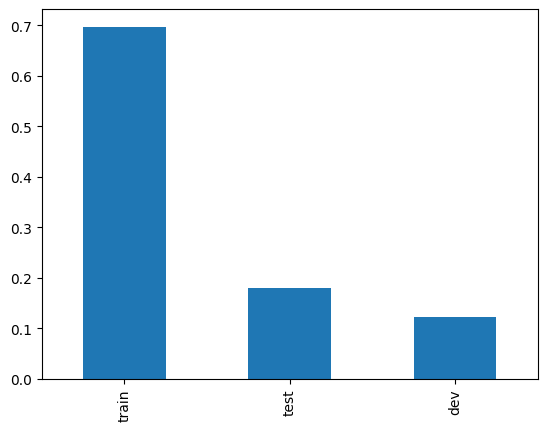

In [ ]:
# plot the distribution of partitions with the percentage of each partition
df['partition'].value_counts(normalize=True).plot(kind='bar')

In [4]:
df_train = df[df['partition'] == 'train']
df_test = df[(df['partition'] == 'test')]
df_dev = df[(df['partition'] == 'dev')]


In [5]:
corpus_train = df_train['utt'].tolist()
corpus_dev = df_dev['utt'].tolist()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(corpus_train)

X_dev = vectorizer.transform(corpus_dev)
print(X_train.shape, X_dev.shape)

(587214, 294176) (103683, 294176)


In [26]:
print(vectorizer.get_feature_names_out())

['a5' 'aa' 'aabot' ... '힘들었어' '힙합' '２つめのポッドキャストを再生して']


In [10]:
y_train = df_train['intent']
y_dev = df_dev['intent']

print(X_train.shape, y_train.shape, X_dev.shape, y_dev.shape)

(587214, 294176) (587214,) (103683, 294176) (103683,)


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [12]:
y_pred = clf.predict(X_dev)
print(y_pred)

['iot_hue_lightoff' 'iot_hue_lightdim' 'calendar_set' ...
 'email_sendemail' 'calendar_set' 'calendar_set']


In [13]:
clf.score(X_dev, y_dev)

0.6197062199203341

In [14]:
import matplotlib.pyplot as plt

def plot_learning_curve(
    title,
    train_sizes,
    train_scores,
    test_scores,
    fit_times,
    score_times,
    axes=None,
    ylim=None,
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    axes = axes.reshape(-1)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig = fig.delaxes(axes[-1])

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    # Plot n_samples vs score_times
    axes[3].grid()
    axes[3].plot(train_sizes, score_times_mean, "o-")
    axes[3].fill_between(
        train_sizes,
        score_times_mean - score_times_std,
        score_times_mean + score_times_std,
        alpha=0.1,
    )
    axes[3].set_xlabel("Training examples")
    axes[3].set_ylabel("score_times")
    axes[3].set_title("Scalability of the model")

    # Plot score_time vs score
    score_time_argsort = score_times_mean.argsort()
    score_time_sorted = score_times_mean[score_time_argsort]
    test_scores_mean_sorted = test_scores_mean[score_time_argsort]
    test_scores_std_sorted = test_scores_std[score_time_argsort]
    axes[4].grid()
    axes[4].plot(score_time_sorted, test_scores_mean_sorted, "o-")
    axes[4].fill_between(
        score_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[4].set_xlabel("score_times")
    axes[4].set_ylabel("Score")
    axes[4].set_title("Performance of the model")

    return plt

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    clf, X_train, y_train, return_times=True, cv=5, n_jobs=1, random_state=42)

plot_learning_curve(f"Learning curves for",
    train_sizes, train_scores, test_scores, fit_times, score_times)

c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nrtc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\nrtc\AppDat

NameError: name 'plt' is not defined

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_dev_intents = y_dev['intent'].tolist()
y_pred_intents = y_pred[:, 0].tolist()

y_dev_locales = y_dev['locale'].tolist()
y_pred_locales = y_pred[:, 1].tolist()

print(f"-----Results for intents-----\n\n")
# accuracy, precision, recall, f1
print(f"Accuracy: {accuracy_score(y_dev_intents, y_pred_intents)}")
print(f"F1: {f1_score(y_dev_intents, y_pred_intents, average='macro')}")

print(f"-----Results for locales-----\n\n")
# accuracy, precision, recall, f1
print(f"Accuracy: {accuracy_score(y_dev_locales, y_pred_locales)}")
print(f"F1: {f1_score(y_dev_locales, y_pred_locales, average='macro')}")

print(f"-----General Results-----\n\n")
# accuracy, precision, recall, f1
print(f"Accuracy: {accuracy_score(y_dev_intents, y_pred_intents)*accuracy_score(y_dev_locales, y_pred_locales)}")
print(f"F1: {f1_score(y_dev_intents, y_pred_intents, average='macro')*f1_score(y_dev_locales, y_pred_locales, average='macro')}")

-----Results for intents-----


Accuracy: 0.6197062199203341
F1: 0.5462946490365892
-----Results for locales-----


Accuracy: 0.9252143552945035
F1: 0.9218056976937392
-----General Results-----


Accuracy: 0.5733610907355857
F1: 0.5035775201015295


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

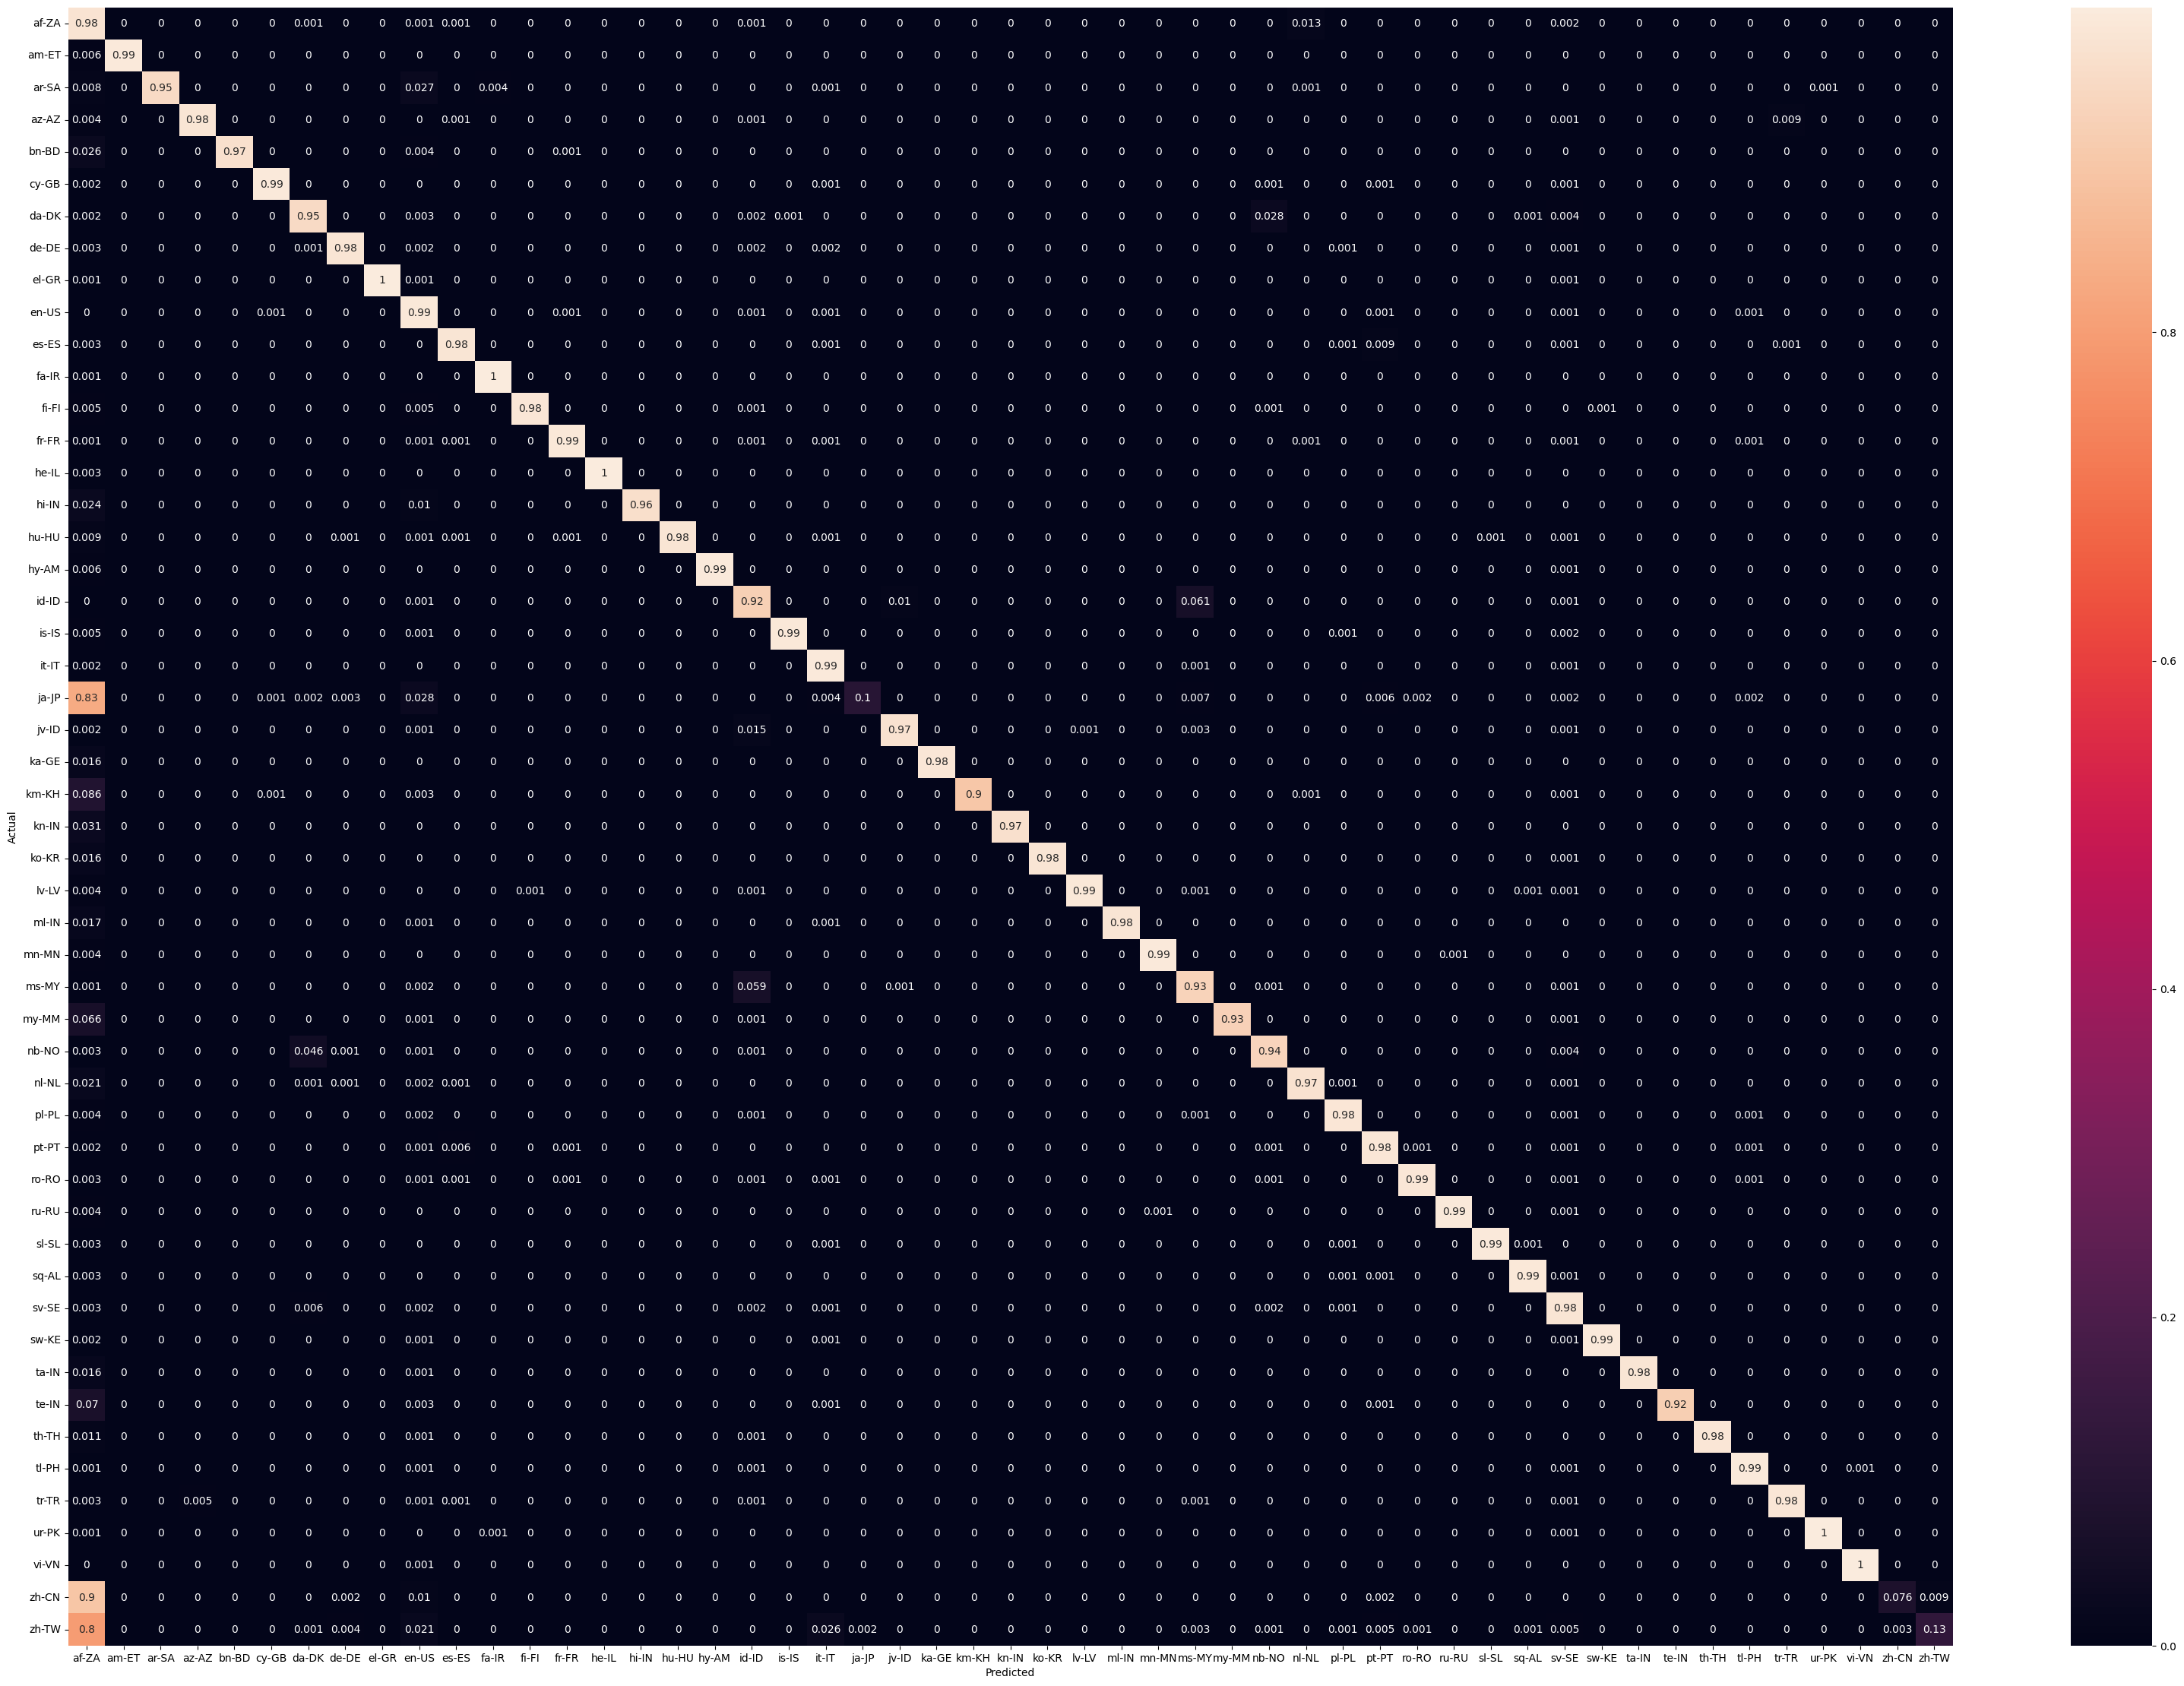

In [58]:
# generate a confusion matrix for the locales
import seaborn as sn

plt.figure(figsize = (40,28))
freq = pd.crosstab(y_dev_locales, y_pred_locales, normalize='index', rownames=['Actual'], colnames=['Predicted'])

freq = np.round(freq, 3)

sn.heatmap(freq, annot=True)


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

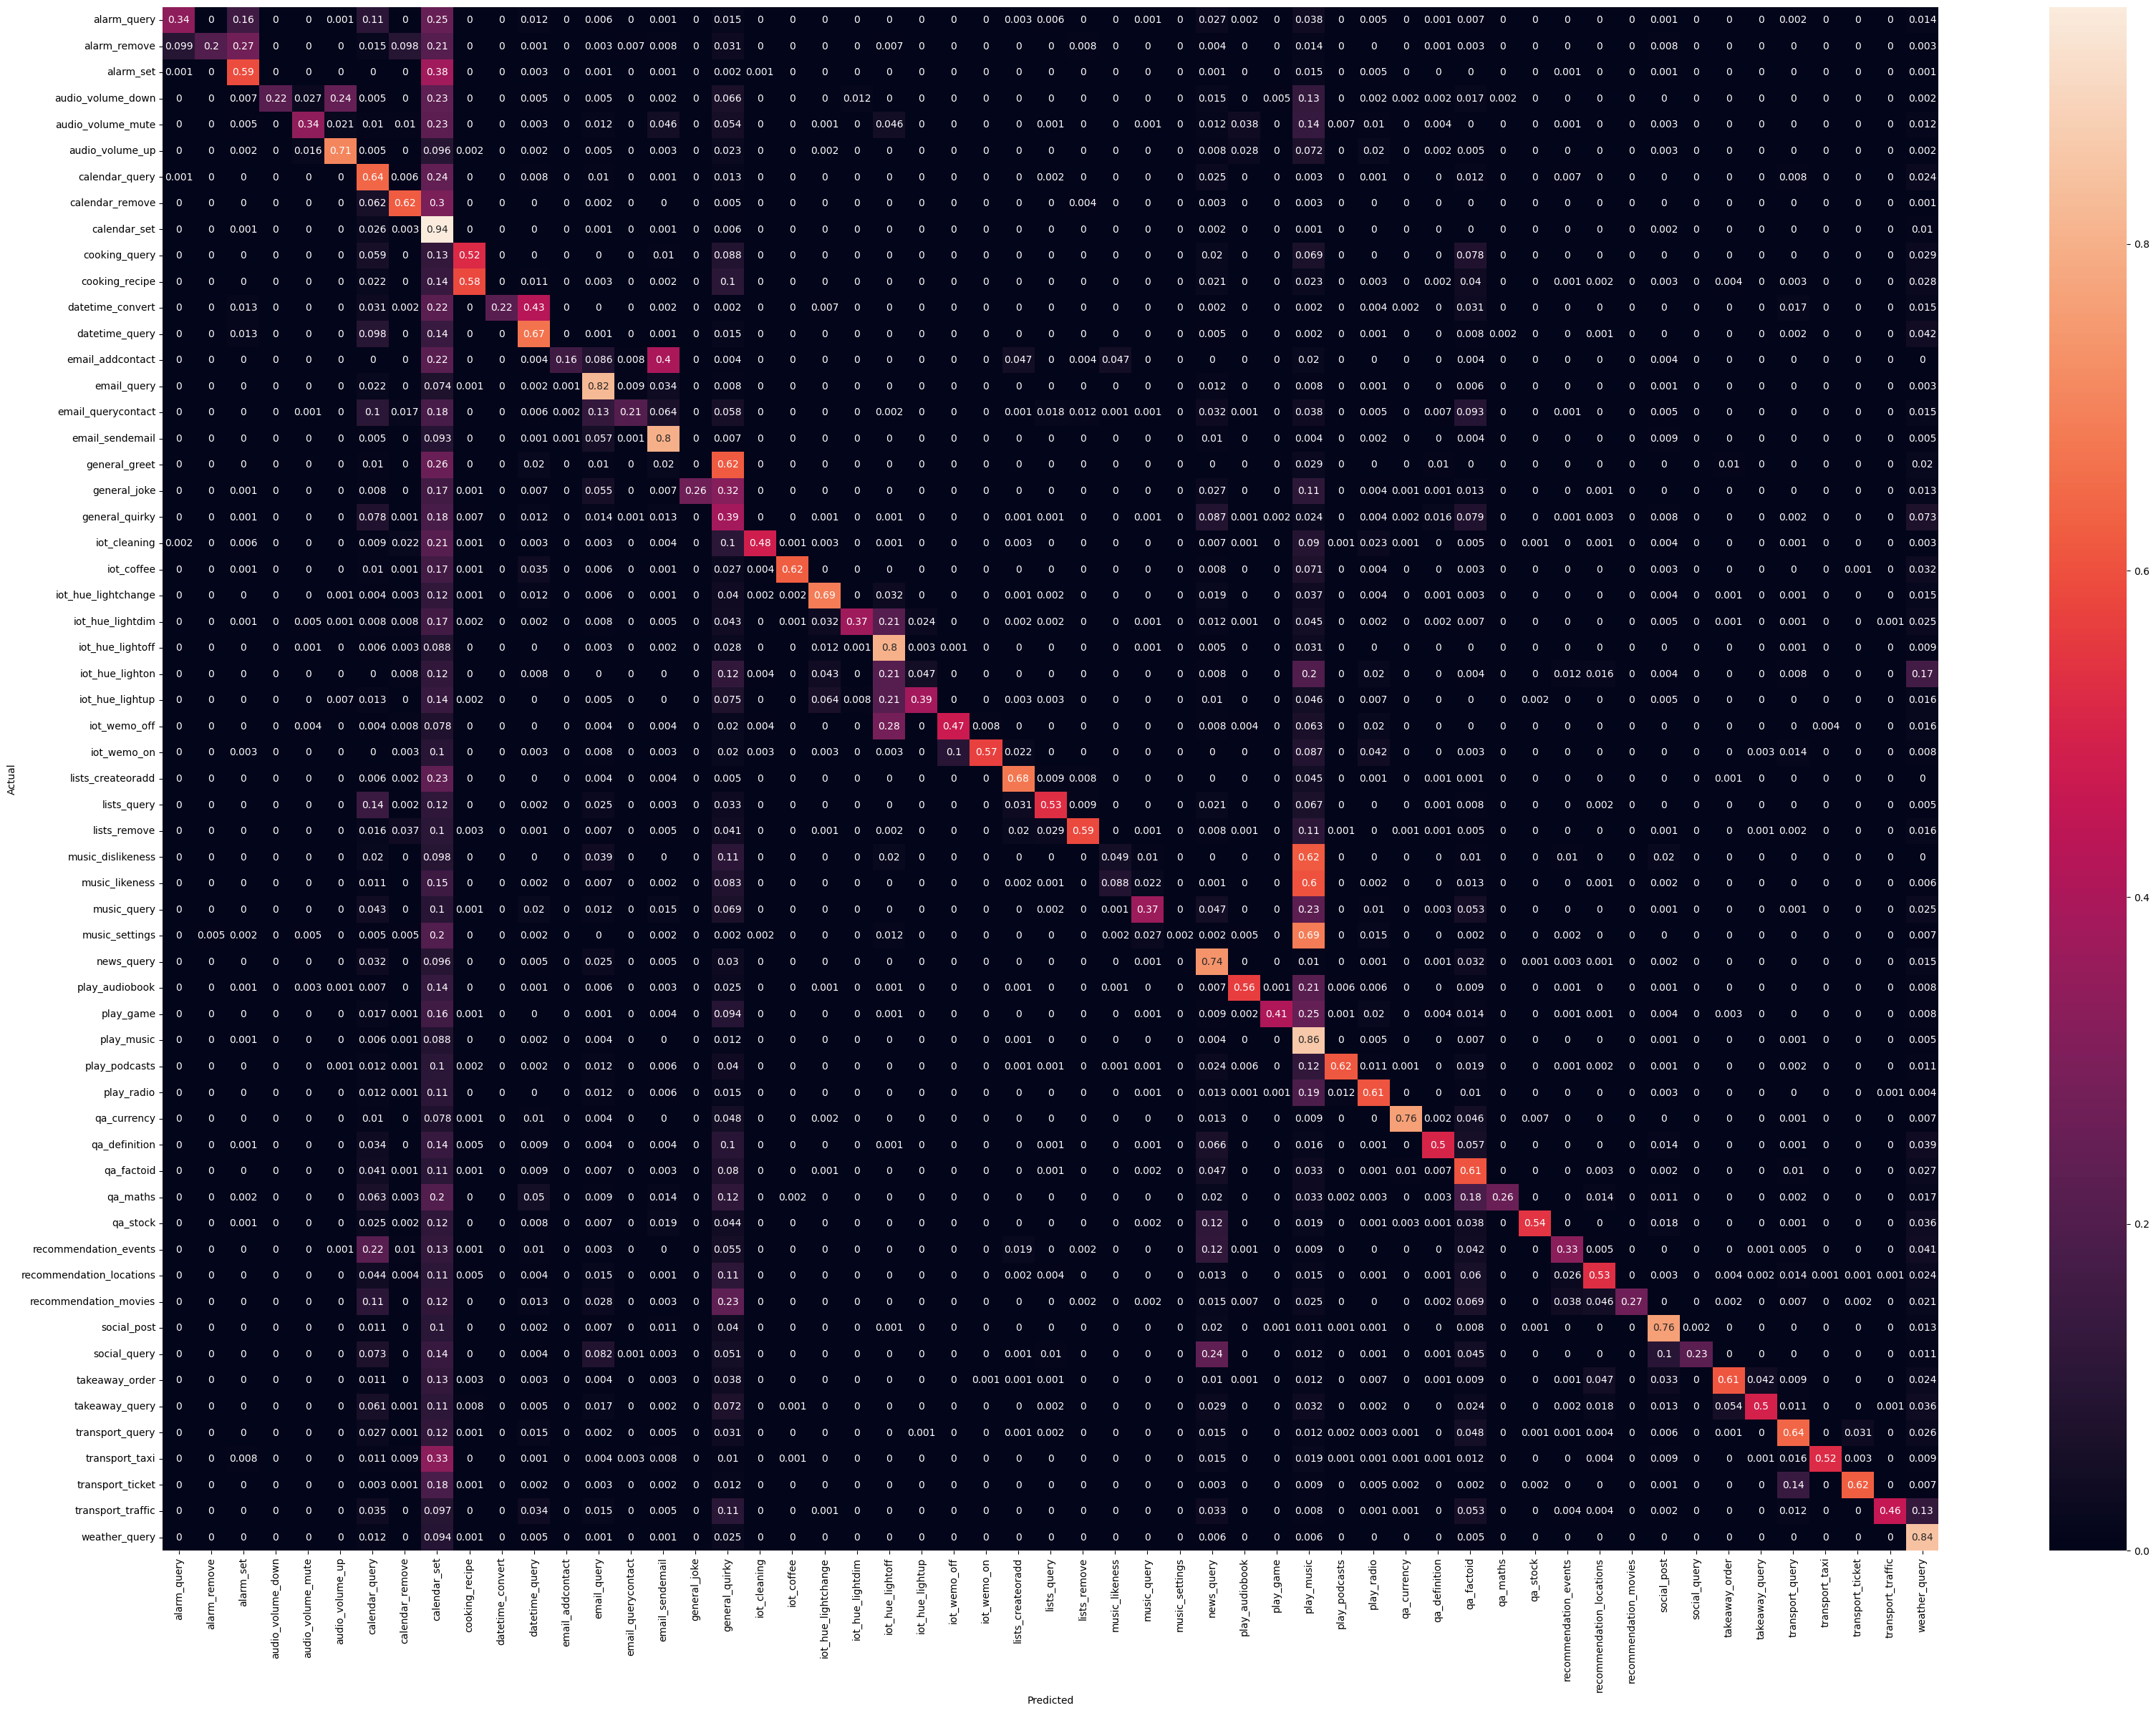

In [59]:
plt.figure(figsize = (40,28))
freq = pd.crosstab(y_dev_intents, y_pred_intents, normalize='index', rownames=['Actual'], colnames=['Predicted'])

freq = np.round(freq, 3)

sn.heatmap(freq, annot=True)
